In [1]:
from ts_utility import *

In [3]:
ret = timeSampling_singlePop_MultiTP_cohort_chrom(1000, nSamples=[5,5,5], gaps=[0,20,50], chr=20, minLen=4.0, \
        record_full_arg=False, demography=None, random_seed=1)


simulating tree seq done


In [ ]:
ret = timeSampling_singlePop_MultiTP_cohort_ind(1000, nSamples=[5,5,5], gaps=[0,20,50], chr=range(1,23), minLen=4.0, \
        record_full_arg=False, demography=None, random_seed=1, nprocess=20)

In [9]:
import pickle
pickle.dump(ret, open('test.1000.ibds', 'wb'))

In [12]:
from analytic_multi import inferConstNe_singlePop_MultiTP
import pickle

ibds = pickle.load(open('test.1000.ibds', 'rb'))
gaps={0:0, 1:20, 2:50}
nSamples={0:5, 1:5, 2:5}
inferConstNe_singlePop_MultiTP(ibds, gaps, nSamples, 5000, minL=4.0, maxL=20.0, step=0.1)



9765.19397459045

# test tskit's internal IBD extractor

In [12]:
import msprime
from ts_utility import readHapMap, bp2Morgan

path2Map = f"/mnt/archgen/users/yilei/Data/Hapmap/genetic_map_GRCh37_chr20.txt"
recombMap = msprime.RateMap.read_hapmap(path2Map)
bps, cMs = readHapMap(path2Map)

ts = msprime.sim_ancestry(samples = 5, population_size=2.5e3, recombination_rate=recombMap, record_provenance=False, end_time=1e3)

In [ ]:
segs = ts.ibd_segments(within=list(range(20)), max_time=1e3, store_pairs=True, store_segments=True)

for pair, val in segs.items():
    print(segs[pair])
    for seg in segs[pair]:
        print(seg)

# for seg in segs[(0,1)]:
#     bp1 = seg.left
#     bp2 = seg.right
#     cm1 = bp2Morgan(bp1, bps, cMs)
#     cm2 = bp2Morgan(bp2, bps, cMs)
#     #print(f'{bp2Morgan(bp1, bps, cMs)}({bp1}) - {bp2Morgan(bp2, bps, cMs)}({bp2})')
#     print(f'{cm2-cm1}')

In [ ]:
from ts_utility import ibd_segments_cohort
print(ibd_segments_cohort(ts, 0, 1, bps, cMs, maxGen=1e3, minLen=0))

In [ ]:
tree1 = ts.at(7705844)
tree2 = ts.at(7712356)
print(tree1.draw(format="unicode"))
print(tree2.draw(format="unicode"))

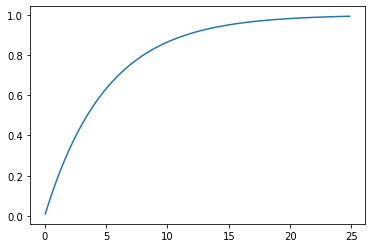

[0.70180272 0.70770742 0.7134952  0.71916838 0.72472922 0.73017994
 0.73552274 0.74075974 0.74589304 0.7509247  0.75585672 0.76069108
 0.76542971 0.77007451 0.77462734 0.77909002 0.78346433 0.78775203
 0.79195482 0.79607439 0.80011239 0.80407043 0.80795009 0.81175293
 0.81548048 0.81913421 0.82271559 0.82622606 0.82966701 0.83303983
 0.83634586 0.83958643 0.84276283 0.84587634 0.84892819 0.85191961
 0.8548518  0.85772593 0.86054314 0.86330457 0.86601133 0.86866448
 0.8712651  0.87381422 0.87631286 0.87876203 0.88116271 0.88351584
 0.88582238 0.88808325 0.89029935 0.89247157 0.89460078 0.89668782
 0.89873354 0.90073875 0.90270425 0.90463084 0.90651927 0.90837032
 0.91018471 0.91196317 0.91370641 0.91541514 0.91709003 0.91873176
 0.92034098 0.92191833 0.92346445 0.92497996 0.92646546 0.92792154
 0.92934879 0.93074777 0.93211906 0.93346319 0.93478071 0.93607214
 0.937338   0.93857879 0.93979501 0.94098715 0.94215568 0.94330107
 0.94442379 0.94552427 0.94660296 0.94766029 0.94869669 0.9497

In [16]:
from tweakIBD_helper import POWER
import numpy as np

def power(x):
    return 1 - np.exp(-0.2*x)

bins = np.arange(0, 25, 0.1)
binMid = (bins[1:]+bins[:-1])/2

import matplotlib.pyplot as plt
plt.plot(binMid, power(binMid))
plt.show()

bins = np.arange(6, 20, 0.1)
binMid = (bins[1:]+bins[:-1])/2
print(power(binMid))

In [1]:
from plot import *
import msprime

minL = 4
maxL = 25
step = 0.25

T = 35
gap = 15
mig = 0.01

demo = msprime.Demography()
demo.add_population(name="A", initial_size=2000)
demo.add_population(name="B", initial_size=2000)
demo.set_symmetric_migration_rate(['A', 'B'], mig)
demo.add_population(name="AB", initial_size=4000)
demo.add_population_split(time=T, derived=["A", "B"], ancestral="AB")
mig_prob = demo.debug().lineage_probabilities(np.arange(1, 1+gap), sample_time=0)[-1,:2,:2]

demo = msprime.Demography()
demo.add_population(name="A", initial_size=2000)
demo.add_population(name="B", initial_size=2000)
demo.set_symmetric_migration_rate(['A', 'B'], mig)
demo.add_population(name="AB", initial_size=4000)
demo.add_population_split(time=T - gap, derived=["A", "B"], ancestral="AB")
rate_AB, _ = demo.debug().coalescence_rate_trajectory(np.arange(1, 101), {'A':1, 'B':1})
rate_BB, _ = demo.debug().coalescence_rate_trajectory(np.arange(1, 101), {'B':2})
rates_sim = mig_prob[0,0]*rate_AB + mig_prob[0,1]*rate_BB




mat = plotPosteriorTMRCA(rates_sim, minL=minL, maxL=maxL, step=step, outFolder=".")
# plt.imshow(mat, cmap='viridis', aspect='auto')
# plt.colorbar()
# plt.xlabel('Segment Length (cM)')
# plt.ylabel('TMRCA (generations backward in time)')
# bins = np.arange(minL, maxL+step, step)
# binMidpoint = (bins[1:]+bins[:-1])/2
# xs = np.arange(0, len(binMidpoint), 10)
# nbins =len(binMidpoint)
# plt.xticks(xs, binMidpoint[xs], fontsize=6)
# plt.savefig('test.pdf.png', dpi=300)
# plt.clf()

# ####### plot cumulative plot

# mat_cdf = np.apply_along_axis(np.cumsum, 0, mat)

# # 25% percentile curve
# index_low = np.apply_along_axis(find_nearest, 0, mat_cdf, 0.025)
# index_high = np.apply_along_axis(find_nearest, 0, mat_cdf, 0.975)
# print(index_low)
# print(index_high)

# plt.imshow(mat_cdf, cmap='viridis', aspect='auto')
# plt.colorbar()
# plt.plot(np.arange(nbins), index_low, color='red', label='$2.5\%$ and $97.5\%$ percentile')
# plt.plot(np.arange(nbins), index_high, color='red')
# plt.xlabel('Segment Length (cM)')
# plt.ylabel('TMRCA (generations backward in time)')
# plt.legend(loc='lower right')
# xs = np.arange(0, len(binMidpoint), 10)
# plt.xticks(xs, binMidpoint[xs], fontsize=6)
# plt.savefig('test.cdf.png', dpi=300)
# plt.clf()


<Figure size 432x288 with 0 Axes>

In [1]:
import numpy as np
from plot import plot_pairwise_TMRCA

gaps = {0:0, 1:15, 2:30, 3:40}
plot_pairwise_TMRCA(gaps, 1e4*np.ones(150), 50, '.', prefix="pairwise", minL=6.0, maxL=20.0, step=0.25)

/mnt/archgen/users/yilei/IBD/timeSampling/ibdDemo/plot.py:235: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(f'{outFolder}/{prefix}.postTMRCA_cdf.png', dpi=300, bbox_inches = "tight")
/mnt/archgen/users/yilei/IBD/timeSampling/ibdDemo/plot.py:236: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(f'{outFolder}/{prefix}.postTMRCA_cdf.pdf', bbox_inches = "tight")
/mnt/archgen/users/yilei/IBD/timeSampling/ibdDemo/plot.py:236: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(f'{outFolder}/{prefix}.postTMRCA_cdf.pdf', bbox_inches = "tight")
/mnt/archgen/users/yilei/IBD/timeSampling/ibdDemo/plot.py:279: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(f'{outFolder}/{prefix}.postTMRCA_

<Figure size 432x288 with 0 Axes>

# test gradient function on cross-coalescent rate with error model

In [13]:
from analytic import twoPopIM_given_coalRate_withError, twoPopIM_given_vecCoalRates_negLoglik_noPenalty
import numpy as np
import scipy.stats

binMidpoint = np.arange(4,20,0.1)
histogram = np.random.randint(0, 100, size=len(binMidpoint))
G = np.array([286.279, 268.840, 223.361, 214.688, 204.089, 192.040, 187.221, 168.003, 166.359, 181.144, 158.219, 174.679, 125.706, 120.203, 141.860, 134.038, 128.491, 117.709, 107.734, 108.267, 62.786, 74.110])
Ne = np.random.randint(100, 10000, size=100).astype('float64')
coalRate = 1/(2*Ne)

# make some fake data about FP rate, power, and length bias
POWER = 1 - 1/(1+0.077*np.square(binMidpoint)*np.exp(0.54*binMidpoint))
FP = np.exp(-binMidpoint)
nBins = len(binMidpoint)
row = np.arange(nBins).reshape(1, nBins)
col = np.arange(nBins).reshape(nBins, 1)
R = scipy.stats.norm.pdf(row - col)

npairs = 50
_, grad_analytic = twoPopIM_given_vecCoalRates_negLoglik_noPenalty(coalRate, histogram, binMidpoint, G, npairs, 15, FP=FP, R=R, POWER=POWER)

step=1e-12
grad = np.zeros(100)
for i in range(100):
    coalRate1 = np.copy(coalRate)
    coalRate2 = np.copy(coalRate)
    coalRate1[i] -= step
    coalRate2[i] += step
    loglike1, _ = twoPopIM_given_vecCoalRates_negLoglik_noPenalty(coalRate1, histogram, binMidpoint, G, npairs, 15, FP=FP, R=R, POWER=POWER)
    loglike2, _ = twoPopIM_given_vecCoalRates_negLoglik_noPenalty(coalRate2, histogram, binMidpoint, G, npairs, 15, FP=FP, R=R, POWER=POWER)
    grad[i] = (loglike2 - loglike1)/(2*step)
print(grad[:10])
print(grad_analytic[:10])
print(np.linalg.norm(grad-grad_analytic))

[-4911791.62054323 -4347172.76220908 -3776787.7074657  -3233551.97906494
 -2734991.53990997 -2291347.30034275 -1904739.29251311 -1573637.74633268
 -1293075.91123506 -1058175.25763996]
[-4911792.26597307 -4347172.14809655 -3776785.42822906 -3233551.74205972
 -2734994.68855558 -2291348.36679735 -1904740.90415459 -1573637.98035413
 -1293074.86996174 -1058174.67020851]
9.075995775464438


In [2]:
from analytic_multi import inferVecNe_singlePop_MultiTP

# plot for the simulated error model

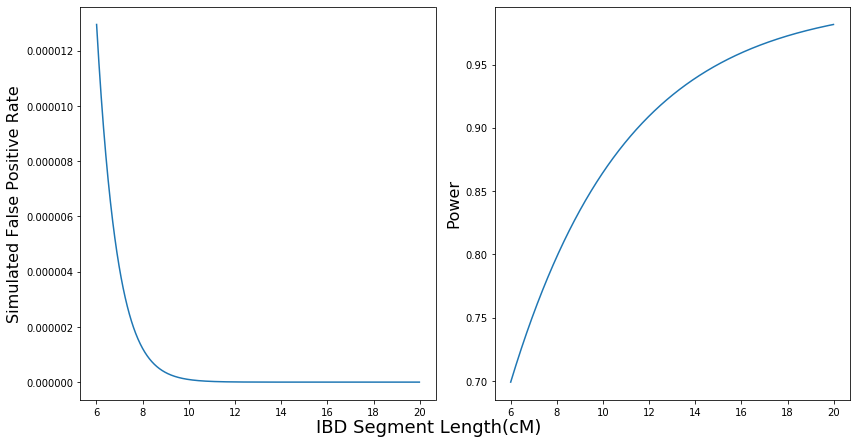

In [20]:
from tweakIBD_helper import FP, power2
import numpy as np
import matplotlib.pyplot as plt

bins = np.arange(6, 20, 0.01)
binmidpoint = (bins[1:]+bins[:-1])/2

fig, axs = plt.subplots(1, 2, sharex=True, figsize=(12, 6), tight_layout=True)

### false positive

fp = 100*FP(binmidpoint)
axs[0].plot(binmidpoint, fp)
#axs[0].set_xlabel('IBD Segment Length')
axs[0].set_ylabel('Simulated False Positive Rate', fontsize=16)

### power
power = power2(binmidpoint)
axs[1].plot(binmidpoint, power)
#axs[1].set_xlabel('IBD Segment Length')
axs[1].set_ylabel('Power', fontsize=16)

fig.text(0.5, 0.0, 'IBD Segment Length(cM)', fontsize=18, ha='center', va='center')
plt.savefig('error_model_sim.png', dpi=300, bbox_inches = "tight")
plt.savefig('error_model_sim.pdf', bbox_inches = "tight")

# test gradient function for the beta term with different weights for each summand

In [8]:
import numpy as np
from scipy.ndimage import shift


def eval(x, weights):
    assert(len(x) - len(weights) == 1)
    return np.sum((np.diff(x, n=1)**2)*weights)

def grad_analytic(x, weights):
    assert(len(x) - len(weights) == 1)
    grad = np.zeros_like(x)
    grad[1:-1] = 2*weights[1:]*x[1:-1] + 2*weights[:-1]*x[1:-1] - 2*weights[:-1]*shift(x, 1)[1:-1] - 2*weights[1:]*shift(x, -1)[1:-1]
    grad[0] = -2*weights[0]*(x[1] - x[0])
    grad[-1] = 2*weights[-1]*(x[-1] - x[-2])
    return grad

def grad_empirical(x, weights):
    grad = np.zeros_like(x)
    for i in range(len(x)):
        x1 = np.copy(x)
        x1[i] += 1e-6
        eval1 = eval(x1, weights)
        x2 = np.copy(x)
        x2[i] -= 1e-6
        eval2 = eval(x2, weights)
        grad[i] = (eval1 - eval2)/(2e-6)
    return grad



In [10]:
x = np.random.randint(100, 1000, size=100)
x = x.astype(np.double)
weights = np.random.rand(99)

grad = grad_analytic(x, weights)
grad_emp = grad_empirical(x, weights)

np.linalg.norm(grad - grad_emp)

0.002733780325247116

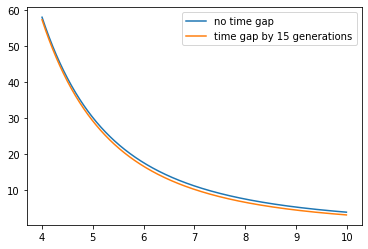

In [25]:
from analytic import singlePop_2tp
import numpy as np

ls = np.arange(4, 10, 0.01)
ibd0 = []
ibd1 = []
for l in ls:
    # suppose on a chromosome of 2 morgen with diploid pop size 250
    ibd0.append(singlePop_2tp(2.0, l/100, 0, 250))
    ibd1.append(singlePop_2tp(2.0, l/100, 15, 250))

import matplotlib.pyplot as plt
plt.plot(ls, ibd0, label='no time gap')
plt.plot(ls, ibd1, label='time gap by 15 generations')
plt.legend(loc='upper right')

/tmp/ipykernel_3058079/182557605.py:2: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/mnt/archgen/users/yilei/IBDsim/realMosaicSim_1240k/v54.1_1240K_public.anno', sep='\t')


(array([ 31.,  84., 188., 637., 907., 857., 472., 329., 192., 122.,  82.,
         30.,  19.,  12.,   5.,   2.,   5.,   2.,   2.,   2.,   3.,   0.,
          0.,   2.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240]),
 <a list of 24 Patch objects>)

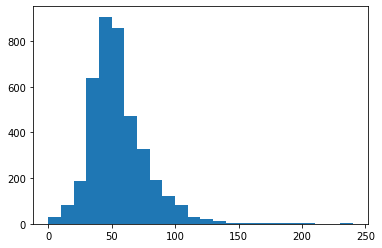

In [6]:
import pandas as pd
data = pd.read_csv('/mnt/archgen/users/yilei/IBDsim/realMosaicSim_1240k/v54.1_1240K_public.anno', sep='\t')
data_cal20 = data[data['Method for Determining Date; unless otherwise specified, calibrations use 95.4% intervals from OxCal v4.4.2 Bronk Ramsey (2009); r5; Atmospheric data from Reimer et al (2020)'] == 'Direct: IntCal20']

import matplotlib.pyplot as plt
import numpy as np
bins = np.arange(0,250,10)
plt.hist(data_cal20['Date standard deviation in BP [OxCal sigma for a direct radiocarbon date, and standard deviation of the uniform distribution between the two bounds for a contextual date]'], bins=bins)